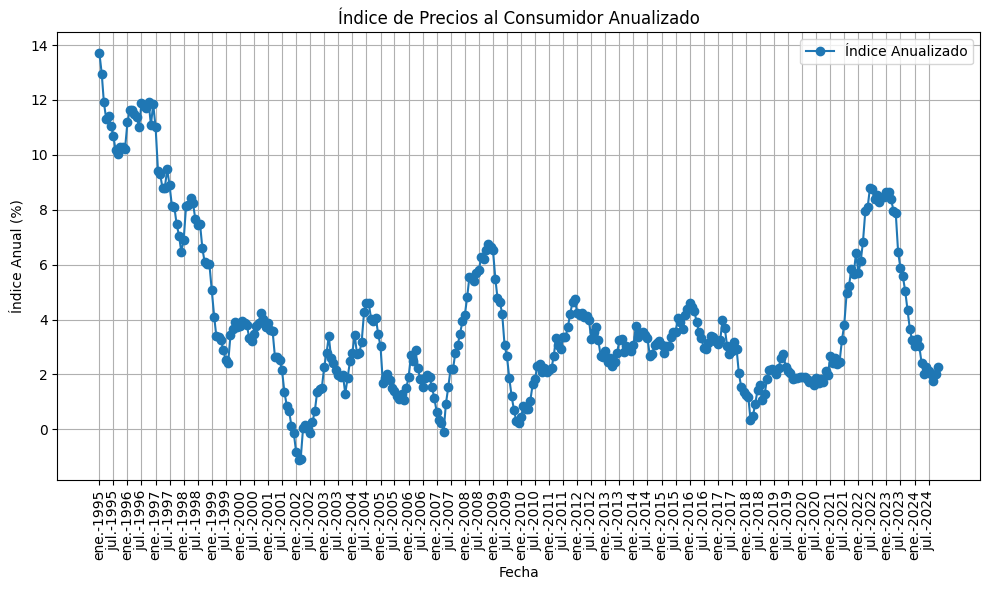

C:\Users\alan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


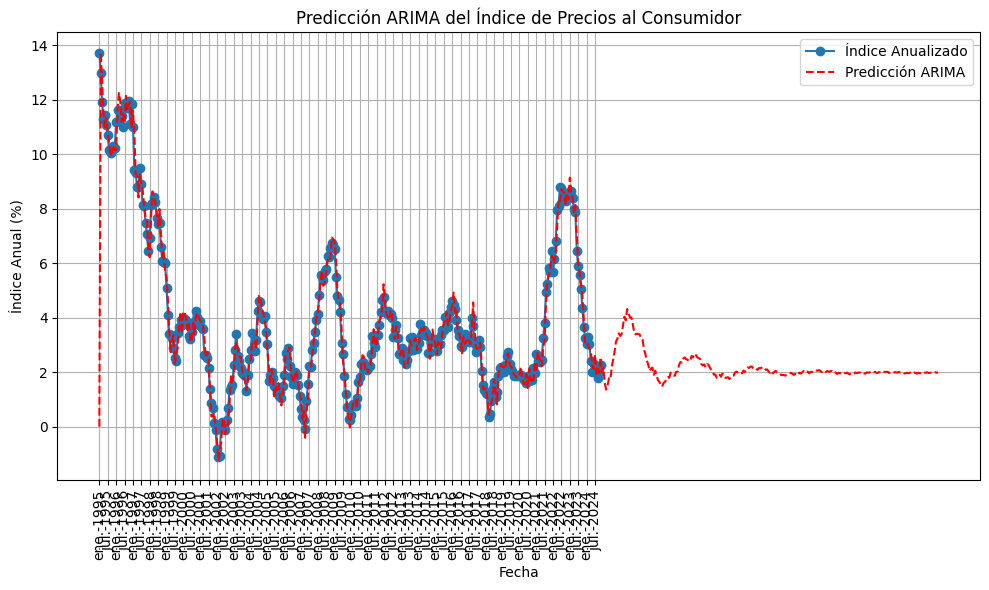

Predicciones exportadas a D:/alan/workspace/isa/predicciones_arima.xlsx


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import locale

# Establecer el locale a español
locale.setlocale(locale.LC_TIME, 'es_ES.utf8')  # Ajusta según tu sistema
# En Windows, prueba 'Spanish_Spain.1252'

# Cargar datos
data = pd.read_excel(
    'D:/alan/workspace/isa/01_indice-precios_al_consumidor-lm_nov24.xlsx', 
    skiprows=3,
    usecols='A:F'
)

# Limpiar y procesar datos
data['Año'] = data['Año'].ffill().astype(int)
meses_mapeo = {
    'Enero': '01', 'Febrero': '02', 'Marzo': '03', 'Abril': '04',
    'Mayo': '05', 'Junio': '06', 'Julio': '07', 'Agosto': '08',
    'Setiembre': '09', 'Octubre': '10', 'Noviembre': '11', 'Diciembre': '12'
}
data['Mes'] = data['Mes'].map(meses_mapeo)
data['Fecha'] = pd.to_datetime(data['Año'].astype(str) + '-' + data['Mes'] + '-01', format='%Y-%m-%d')

# Convertir 'Anual' a numérico y eliminar filas con NaN
data['Anual'] = pd.to_numeric(data['Anual'], errors='coerce')
data.dropna(subset=['Anual'], inplace=True)

# Asegurarnos de que la fecha es el índice
data.set_index('Fecha', inplace=True)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Anual'], label='Índice Anualizado', marker='o')

# Ajustar etiquetas del eje X
plt.xticks(
    ticks=data.index[::6],  # Muestra una etiqueta cada 6 puntos
    labels=data['Anual'].index.strftime('%b-%Y')[::6],  # Muestra el mes y el año
    rotation=90  # Rotar las etiquetas para mejor visibilidad
)

# Títulos y etiquetas
plt.title('Índice de Precios al Consumidor Anualizado')
plt.xlabel('Fecha')
plt.ylabel('Índice Anual (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()  # Ajusta el layout para evitar superposiciones
plt.show()

############
# Ajuste y predicción con ARIMA
model = ARIMA(data['Anual'], order=(50, 1, 0))  # Ajusta el orden del modelo (p, d, q)
model_fit = model.fit()

# Ajustar las fechas de 'start' y 'end' a las correspondientes en el índice
start_date = data.index.min()  # Empieza desde el primer dato disponible
end_date = pd.to_datetime('2044-12-01')

forecast_result = model_fit.get_prediction(start=start_date, end=end_date, dynamic=False)

# Obtener las predicciones
forecast_values = forecast_result.predicted_mean

# Graficar predicciones
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Anual'], label='Índice Anualizado', marker='o')
plt.plot(forecast_values.index, forecast_values, label='Predicción ARIMA', color='red', linestyle='--')
plt.xticks(
    ticks=data.index[::6],
    labels=data['Anual'].index.strftime('%b-%Y')[::6],
    rotation=90
)
plt.title('Predicción ARIMA del Índice de Precios al Consumidor')
plt.xlabel('Fecha')
plt.ylabel('Índice Anual (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


forecast_df = pd.DataFrame({
    'Fecha': forecast_values.index,
    'Predicción': forecast_values.values
})

output_file = 'D:/alan/workspace/isa/predicciones_arima.xlsx'
forecast_df.to_excel(output_file, index=False)

print(f'Predicciones exportadas a {output_file}')
